In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
# from matplotlib.mlab import rec2csv

import emcee
import corner

import _pickle as cPickle
# from astropy.io import ascii

import matplotlib as mpl

In [17]:
nstar = 6038
xlon = 2528
ylat = 2235
ell = 0.13
pa = -7
r_p = 2672

In [4]:
cat = np.genfromtxt('../forElena16Nov/SAGITTARIUS-II_cat16Nov.dat',names=True)

In [39]:
x = cat['x_f606w']
y = cat['y_f606w']
m606 = cat['magr_f606w']
dm606 = cat['err_f606w']
m814 = cat['magr_f814w']
dm814 = cat['err_f814w']
flag = cat['star_f814w']

In [40]:
# Elliptical radius of each x,y coord
costh = np.cos(np.radians(-pa))
sinth = np.sin(np.radians(-pa))
dx = x-xlon
dy = y-ylat
radius = np.sqrt(((dx*costh-dy*sinth)/(1-ell))**2 + (dx*sinth+dy*costh)**2)

In [60]:
s0 = nstar*10000/(np.pi*r_p**2*(1-ell))

In [42]:
# s0 = nstar/(np.pi*r_p**2)

In [61]:
yplot = s0 * (1+(radius**2/r_p**2))**(-2)

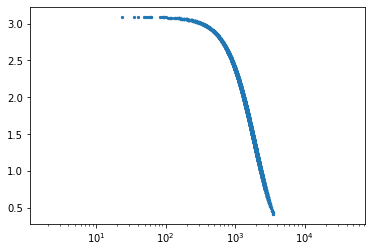

In [63]:
fig, ax = plt.subplots()

# ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(radius,yplot,s=5)

plt.show()

In [64]:
def plummer(radius,rich,r_h,ell):
    
    term1 = rich / (np.pi * r_h**2 * (1-ell))
    term2 = (1 + (radius**2/r_h**2))**(-2)
    
    return term1 * term2
    

In [65]:
arr = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [71]:
plummer0 = plummer(2485*arr,9928,2485,0.06)
plummer1 = plummer(2626*arr,5794,2626,0.19)
plummer2 = plummer(2513*arr,9001,2513,0.16)
plummer3 = plummer(2855*arr,7076,2855,0.13)
plummer4 = plummer(2394*arr,8154,2394,0.08)
plummer5 = plummer(2598*arr,5356,2598,0.20)
plummer6 = plummer(2673*arr,6038,2673,0.13)

In [92]:
plummer7 = plummer(2217*arr,7797,2217,0.14)
plummer8 = plummer(2748*arr,11059,2748,0.10)

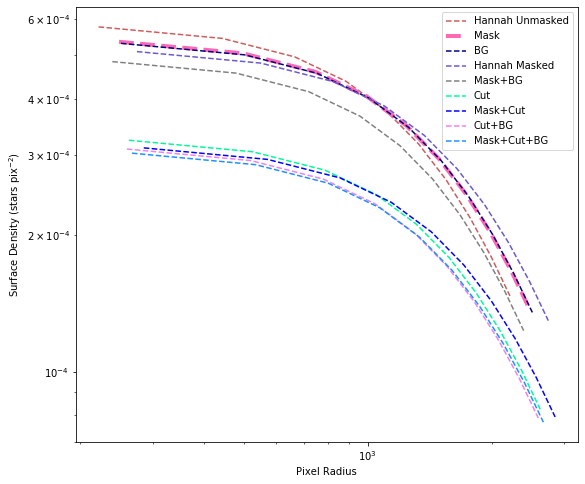

In [94]:
fig,ax = plt.subplots(figsize=(9,8))

ax.plot(2217*arr,plummer7,label='Hannah Unmasked',color='indianred',ls='--')
ax.plot(2485*arr,plummer0,label='Mask',ls='--',color='hotpink',linewidth=4)
ax.plot(2513*arr,plummer2,label='BG',ls='--',color='navy')
ax.plot(2748*arr,plummer8,label='Hannah Masked',color='slateblue',ls='--')
ax.plot(2394*arr,plummer4,label='Mask+BG',ls='--',color='grey')


ax.plot(2626*arr,plummer1,label='Cut',ls='--',color='mediumspringgreen')
ax.plot(2855*arr,plummer3,label='Mask+Cut',ls='--',color='blue')
ax.plot(2598*arr,plummer5,label='Cut+BG',ls='--',color='violet')
ax.plot(2673*arr,plummer6,label='Mask+Cut+BG',ls='--',color='dodgerblue')

ax.set_xlabel('Pixel Radius')
ax.set_ylabel(r'Surface Density (stars pix$^{-2}$)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.show()